# Asher's Integrated Project!!!!!



I work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. I need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.
My job is to look at this data and plan a campaign for the year 2017! 

My plan for this project is:

1. import proper libraries 
2. inspect data for missing values and wrong information
3. Fill in whatever missing data I am able to 
4. Analyze data look at most popular platforms and relevant years
5. Select a relevant time period that will allow us to have a good campaign for 2017 
6. Analyze and gain a better understanding of select data that will give us good insight for this campaign 
7. Test Hypotheses that are required 
8. Conclusion! 


In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mt
data = pd.read_csv('Downloads/games.csv')
display(data.describe())
data.info()
display(data.head(50))

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [243]:
print(data.head(5))

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


### 1. Opening and exploring the Data 

Here we imported a few packages: 
- pandas - for our dataframes and lovely data wrangling 
- numpy - for our math 
- matplotlib - for our beautiful graphs
- scipy - for our statistical analysis 
- math - so we can round away!

We are also able to see our data and see a few missing values that we will fill soon!

###  Converting the Data

In [244]:
data.columns = data.columns.str.lower()
data['user_score'].replace('tbd', np.nan, inplace=True)
data['user_score'] = data['user_score'].astype(float)

In [245]:
data.dropna(subset=['year_of_release'])
data['year_of_release'] = round(data['year_of_release'])


Here we made the column names lowercase to make working with them easier. We also replaced the TBDs because these are values for games taht have not yet been released so we will not include them in the dataset. We also changed the userscore type to float so we can use that column for calculations!

In [246]:
data['total_sales'] = data.na_sales + data.eu_sales + data.other_sales + data.jp_sales
display(data.head(50))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


We create a total sales number so we can run calculations on not only a regional basis but a sprawling worldwide basis.

In [247]:
def fill_year(row):
    name = row['name']
    platform = row['platform']
    year = row['year_of_release']
    if year == 0:
        same_game = data.query('name == @name and platform != @platform')
        actual_year = same_game.query('year_of_release != 0')['year_of_release'].mean()
        return actual_year
    else:
        return year

In [248]:
data['year_of_release'] = data['year_of_release'].fillna(0)
data['year_of_release'] = data.apply(fill_year, axis=1)

For games that have multiple entries but are missing a year value we use this formula to find the other copy of the game and to fill in the year so we can have the most complete data set possible!

# Analyzing the Data 

We start here by looking at how many titles have been released in each year! We see that 2008 was a great year for video games. 

In [249]:
display(data['year_of_release'].sort_values().value_counts())
display(data['year_of_release'].min())

2008.000000    1440
2009.000000    1430
2010.000000    1269
2007.000000    1202
2011.000000    1153
2006.000000    1018
2005.000000     947
2002.000000     842
2003.000000     784
2004.000000     764
2012.000000     662
2015.000000     606
2014.000000     581
2013.000000     547
2016.000000     502
2001.000000     484
1998.000000     379
2000.000000     350
1999.000000     339
1997.000000     289
1996.000000     263
1995.000000     219
1994.000000     121
1993.000000      62
1981.000000      46
1992.000000      43
1991.000000      41
1982.000000      36
1986.000000      21
1989.000000      17
1983.000000      17
1990.000000      16
1987.000000      16
1988.000000      15
1985.000000      14
1984.000000      14
1980.000000       9
2002.500000       2
1998.500000       1
2001.500000       1
2005.500000       1
2008.250000       1
2013.500000       1
2003.333333       1
2001.333333       1
1998.333333       1
2003.750000       1
Name: year_of_release, dtype: int64

1980.0

It looks like all the years from 1980 were relevant considering that over 9 games were released in 1980 alone. 

In [250]:
lifespan = data.sort_values(by='year_of_release').pivot_table(index='platform', values='year_of_release', aggfunc=['first', 'last'])
display(lifespan)

,first,last
,year_of_release,year_of_release
platform,,
2600,1980.000000,1998.333333
3DO,1994.000000,1995.000000
3DS,2003.333333,2016.000000
DC,1998.000000,2008.000000
DS,1985.000000,2013.000000
GB,1988.000000,2001.000000
GBA,2000.000000,2007.000000
GC,2001.000000,2007.000000


### Lifespan of systems 

It looks like there were a few systems that were quickly discontinued but it is safe to say that many have a life span of 8-11 years with the ones ending in 2016 still being relevant. One notable outlier is the PC that has managed to stay around for quite some time. That being said computers have changed quite a bit since the 1980s so it is not that people are necessarily still buying the games they purchased for PC from the 1980s it is more that the PC has not had new iterations like the ps1, ps2 and ps3.

In [251]:
sales_data = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(sales_data.head(50))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


In [252]:
relevant_slice = data.loc[data['year_of_release'] >= 2010]


# Chosing the right year to work with!
I chose the year to be 2010 because this a good cross section between the new gen consoles and the last generation of consoles. In addition the likelihood that someone who was buying games in 2010 is still buying in 2017 is still possible, whereas, it is probably a very small amount of people who bought games in the 80s or 90s who are still hardcore buyers at this time. The average lifespan of a platform is somewhere between 8-11 years but I don't want to necessarily work with a dying platform. While some might want to work with a larger dataset because there are more numbers to play with, I chose a smaller dataset in order to be razor focused. The end goal is to create an effective campaign not look at the history of video games through the ages. We are narrowing it down so we can be hyper effective. 

In [253]:
slice_sorted = relevant_slice.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
display(slice_sorted)

platform
PS3     590.65
X360    553.30
PS4     314.14
3DS     258.51
Wii     225.06
XOne    159.32
DS      124.89
PC      124.82
WiiU     82.19
PSP      64.55
PSV      53.81
PS2       6.09
Name: total_sales, dtype: float64

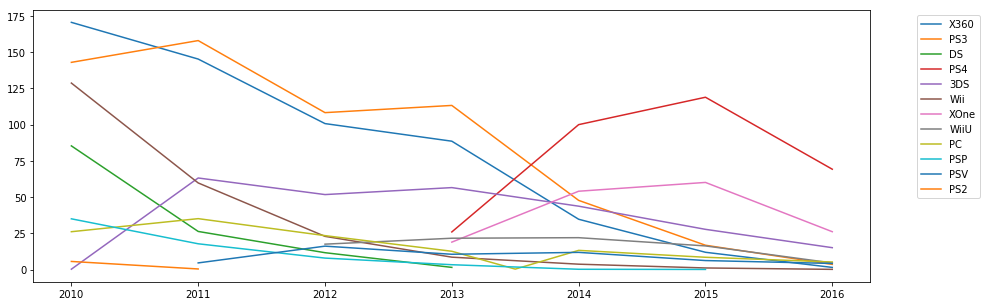

In [254]:
# def current_platform(platform):
#     return pd.DataFrame({'platform:'})
#     def get_user_used_for_month(month):
#     return pd.DataFrame({'minutes': pivotcalls[month], 
#                          'messages': pivotmessages[month],
#                          'mb': pivotinternet[month],
#                          'is_registered': users.set_index('user_id')['month'] <= month,
#                          'plan': users.set_index('user_id')['plan'],
#                          #'profit': charges_per_month[month],
#                          'city': users.set_index('user_id')['city']
#                         }).fillna(0)
# relevant_years =  relevant_slice.groupby('platform')['year_of_release']
# for platform in relevant_slice:
#     relevant_slice.platform.plot.line()    
#     plt.show()
relevant_slice_platforms = list(relevant_slice.platform.unique())

fig, axes = plt.subplots(figsize=(15,5))
for x in range(len(relevant_slice_platforms)):
    platform_data = relevant_slice[relevant_slice['platform'] == relevant_slice_platforms[x]]
    pivot = platform_data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    axes.plot(pivot, label = relevant_slice_platforms[x])
    axes.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    


As we can see based on lifespan there are currently a few consoles on their way out. The interesting thing is that ps4 and Xone are currently dipping. It is possible that the next round of games is soon to be released and give that dip a bit of a bump. 

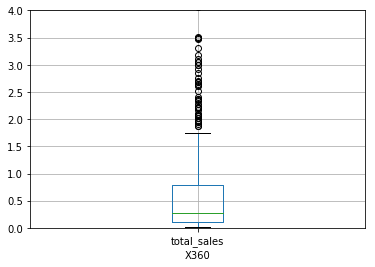

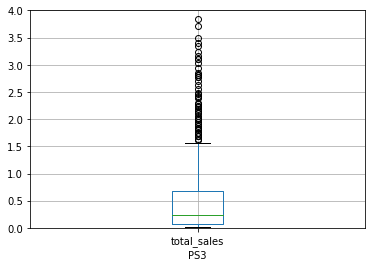

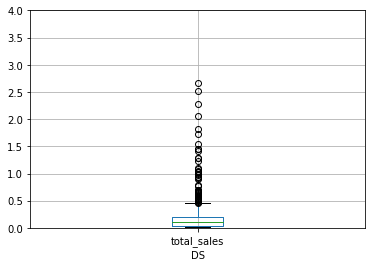

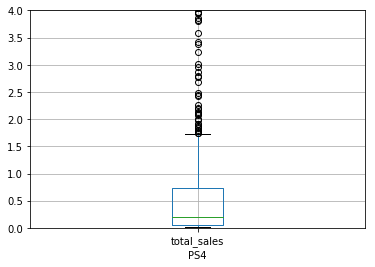

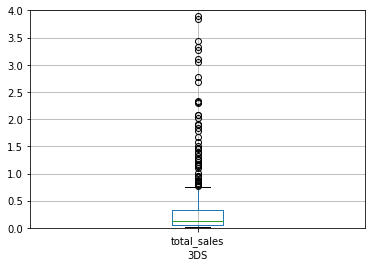

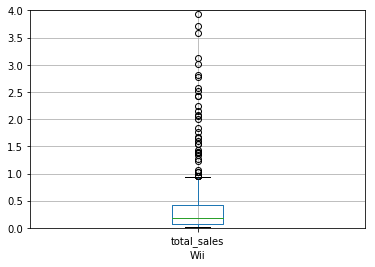

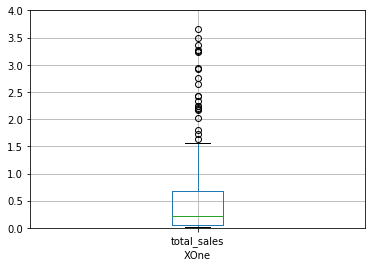

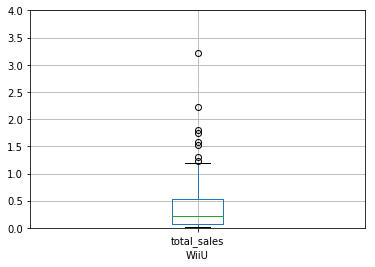

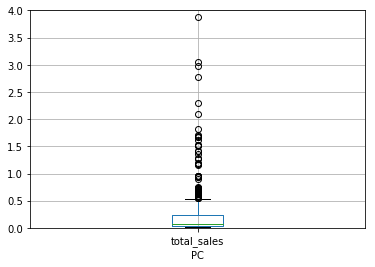

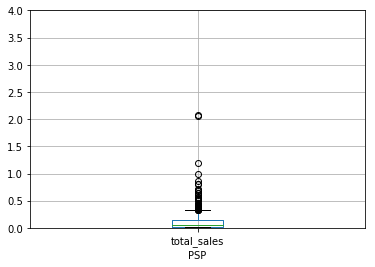

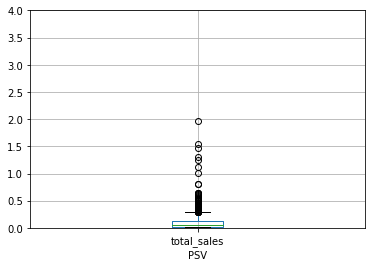

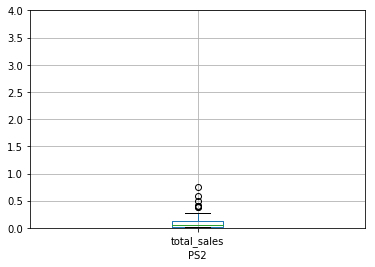

In [255]:
for platform in relevant_slice_platforms:
    platform_data = relevant_slice[relevant_slice['platform'] == platform]
    platform_data.boxplot('total_sales')
    plt.ylim(0, 4)
    plt.xlabel(platform);
    plt.show()

In terms of boxplots there is quite a range in data we are looking at. That being said, it seems like the popular games are really popular and many games don't necessarily do as well. Not all games are created equal I gues! 

# PS3 Analysis 

I selected to look at some of the data involving the ps3 in order to better understand our market and how to target my audience correctly!

In [256]:
#we are going to take a look at how PS3 sales are affected by ratings 

ps3slice = relevant_slice.loc[relevant_slice['platform']=='PS3'].dropna()
display(ps3slice.head(50))


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010.0,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
81,FIFA Soccer 13,PS3,2012.0,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
104,Battlefield 3,PS3,2011.0,Shooter,2.85,2.89,0.35,1.08,85.0,7.5,M,7.17
118,Uncharted 3: Drake's Deception,PS3,2011.0,Action,2.77,2.75,0.19,1.03,92.0,8.3,T,6.74
125,Red Dead Redemption,PS3,2010.0,Action,2.79,2.53,0.17,0.99,95.0,8.8,M,6.48


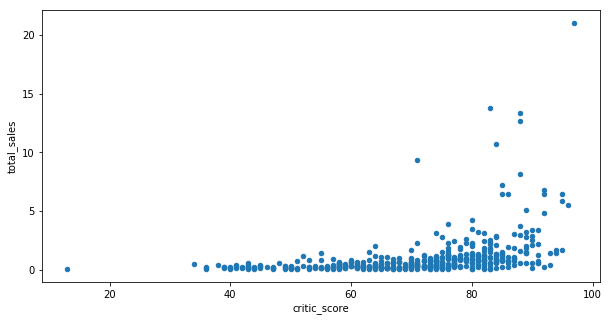

In [257]:
ps3slice.plot(x='critic_score', y = 'total_sales', kind='scatter', figsize=(10, 5))

It does look like critic score has some weight involving game sales. 

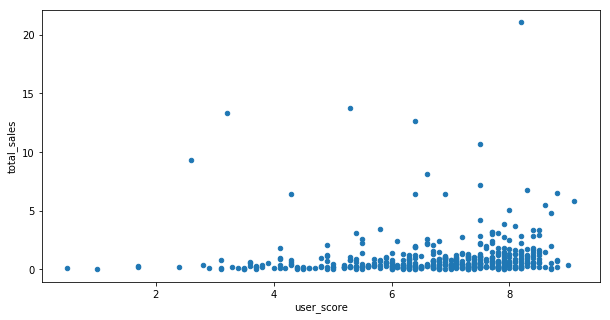

In [258]:
ps3slice.plot(x='user_score', y = 'total_sales', kind='scatter', figsize=(10, 5))

Users seem to be a little less relevant when it comes to scores and sales. Here we see quite a few outliers. 

In [259]:
display(ps3slice['critic_score'].corr(ps3slice['total_sales']))

display(ps3slice['user_score'].corr(ps3slice['total_sales']))

0.3928781854909728

0.08176155988812632

If we look at the correlation value here we see that critic scores definitely have value when it comes to total sales. User scores are much less relevant. 

# same games different platforms 

In [260]:

same_game_diff_plat = relevant_slice[relevant_slice['name'].isin(ps3slice['name'])]
same_game_diff_plat = same_game_diff_plat[same_game_diff_plat['platform'] != "PS3"]


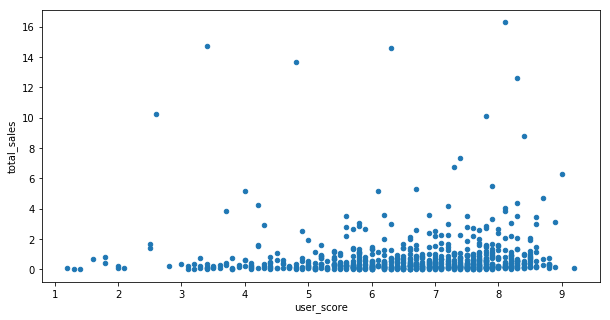

In [261]:
same_game_diff_plat.plot(x = 'user_score', y='total_sales', kind = 'scatter', figsize=(10,5))

Here we see again that user scores are all over the place! Users seem to be pretty bad at picking games when it comes to total sales

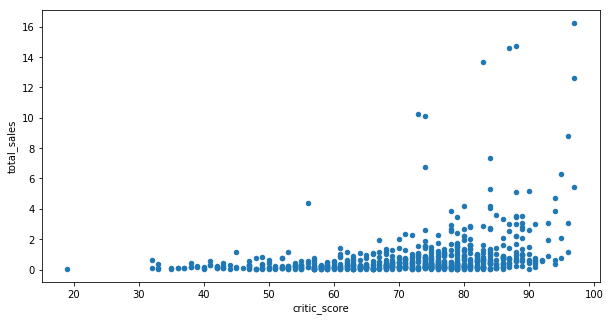

In [262]:
same_game_diff_plat.plot(x = 'critic_score', y='total_sales', kind = 'scatter', figsize=(10,5))

Here we see that critics again do have somewhat of a better idea of what consumers are going to purchase. Or at least what people enjoy and want 

In [263]:
print(same_game_diff_plat['critic_score'].corr(same_game_diff_plat['total_sales']))
print(same_game_diff_plat['user_score'].corr(same_game_diff_plat['total_sales']))

0.3190786557498421
0.04366259507242962


The PS3 numbers and other platform's rating correlations are not very different in the end.  Both critics and users had a little higher correlation with PS3 but overall it is generally similar. 

##  Which Genres Are Most Popular?

In [264]:
genre_grouping = relevant_slice.groupby('genre')['total_sales'].sum()
genre_count =  relevant_slice.groupby('genre')['name'].count()
print(genre_count)
print(genre_grouping.sort_values())
sales_vs_titles_released =  (genre_grouping/genre_count)*100
display(sales_vs_titles_released)

genre
Action          1514
Adventure        563
Fighting         199
Misc             583
Platform         153
Puzzle           117
Racing           237
Role-Playing     569
Shooter          417
Simulation       218
Sports           578
Strategy         173
Name: name, dtype: int64
genre
Puzzle           21.22
Strategy         36.36
Adventure        61.00
Simulation       72.05
Fighting         81.59
Platform        119.72
Racing          122.68
Misc            235.05
Role-Playing    315.33
Sports          329.43
Shooter         482.22
Action          680.68
Name: total_sales, dtype: float64


genre
Action           44.959049
Adventure        10.834813
Fighting         41.000000
Misc             40.317324
Platform         78.248366
Puzzle           18.136752
Racing           51.763713
Role-Playing     55.418278
Shooter         115.640288
Simulation       33.050459
Sports           56.994810
Strategy         21.017341
dtype: float64

# Genre thoughts

At first looking at the data one would think action is by far the most popular category. Then I decided to take a look under the hood to see how many action games were released, there were by far many more action games than any other category. I then decided to divide how many games have been released to total sales and was able to see that shooter games are actually the most profitable per game. One setback of this strategy is that there can be one game released on multiple platforms that did well. At the same time, we cannot discount those sales because they are still relevant to the category. In the end I decided to keep the slice as is because it should balance itself out. Shooter games are always pretty popular and they have followings across many different platforms which gives them a widespread fanbase. It makes sense that shooters are quite popular. What was more surprising was, adventure games performing so poorly. There were quite a few titles released for them but they still lag quite a bit in sales. It was somewhat surprising to see. 

# Breakdown By Region 

For each region (NA, EU, JP), determine:
The top five platforms. Describe variations in their market shares from region to region.
The top five genres. Explain the difference.
Do ESRB ratings affect sales in individual regions?

In [265]:
na_slice = relevant_slice.groupby('platform')['na_sales'].sum()
print('These are the total sales amounts for North American Platforms')
print(na_slice.sort_values(ascending = False))

These are the total sales amounts for North American Platforms
platform
X360    335.93
PS3     230.47
Wii     122.68
PS4     108.74
XOne     93.12
3DS      83.11
DS       60.42
PC       39.87
WiiU     38.10
PSV      12.47
PSP       9.75
PS2       2.32
Name: na_sales, dtype: float64


In [266]:
eu_slice = relevant_slice.groupby('platform')['eu_sales'].sum()
print('These are the total sales amounts for European Union Platforms')
print(eu_slice.sort_values(ascending = False))

These are the total sales amounts for European Union Platforms
platform
PS3     214.74
X360    164.29
PS4     141.09
PC       70.50
Wii      66.35
3DS      61.46
XOne     51.59
DS       28.34
WiiU     25.13
PSV      13.07
PSP       7.69
PS2       1.67
Name: eu_sales, dtype: float64


In [267]:
jp_slice = relevant_slice.groupby('platform')['jp_sales'].sum()
print('These are the total sales amounts for Japans Platforms')
print(jp_slice.sort_values(ascending = False))

These are the total sales amounts for Japans Platforms
platform
3DS     100.62
PS3      59.36
PSP      42.44
DS       27.90
PSV      21.84
Wii      17.75
PS4      15.96
WiiU     13.01
X360      5.47
PS2       0.80
XOne      0.34
PC        0.00
Name: jp_sales, dtype: float64


There is a variation in which platforms are popular by region. This makes some sense considering Microsoft is an American company one would not be too surprised that they have a stronger market share in North America. EU has an affinity for the ps3 which makes sense considering it is one of the flagship sony consoles with quite a library of released titles. The 3ds in Japan also from a geographic standpoint makes sense as Nintendo is a Japenese company and has a larger market share in Japan. 

### Genre Based On Region 

The US and the EU have similar tastes in games it seems. For both the US and EU the three most popular genres are: Action, shooters, and Sports. They do differ a bit on the categories after, but if we are trying to come up with a marketing strategy it is good to know that we do not have to vary too wildly in order to please both American and EU consumers. What is very interesting is that in Japan the set of popular genres is quite different with role-playing being the most popular. Action is still on the list for Japan but it comes in at number 2. We will have to make a unique strategy to target Japanese consumers. 

In [268]:
na_genre = relevant_slice.groupby('genre')['na_sales'].sum()
print('This is Genre popularity for North American consumers')
print(na_genre.sort_values(ascending = False))

This is Genre popularity for North American consumers
genre
Action          294.26
Shooter         238.50
Sports          157.49
Misc            123.92
Role-Playing    112.05
Platform         54.90
Racing           46.11
Fighting         39.05
Simulation       26.67
Adventure        20.84
Strategy         13.54
Puzzle            9.65
Name: na_sales, dtype: float64


In [269]:
eu_genre = relevant_slice.groupby('genre')['eu_sales'].sum()
print('This is Genre popularity for European Union consumers')
print(eu_genre.sort_values(ascending = False))

This is Genre popularity for European Union consumers
genre
Action          236.70
Shooter         172.57
Sports          117.09
Role-Playing     75.48
Misc             66.19
Racing           54.75
Platform         38.30
Simulation       26.39
Fighting         20.33
Adventure        18.88
Strategy         12.64
Puzzle            6.60
Name: eu_sales, dtype: float64


In [270]:
jp_genre = relevant_slice.groupby('genre')['jp_sales'].sum()
print('This is Genre popularity for Japanese consumers')
print(jp_genre.sort_values(ascending = False))

This is Genre popularity for Japanese consumers
genre
Role-Playing    103.59
Action           72.21
Misc             24.54
Platform         15.81
Adventure        15.67
Sports           15.51
Shooter          14.05
Fighting         13.90
Simulation       13.30
Strategy          6.83
Racing            6.68
Puzzle            3.40
Name: jp_sales, dtype: float64


### Rating Breakdown

This breakdown is not too surprising considering the most popular genre for each region. Shooters and action games tend to be more violent therefore they probobly are more likely to have M or T ratings. Role-Playing games tend to be more family friendly. It makes sense based off genre popularity that rating popularity would also follow the average rating for that genre. As noted American and European audiences tend to enjoy more violent and fast track action games while Japan enjoys more role-playing and action and platformers which all have the potential to be less violent than shooters. One other notable thing is that the US and EU both have M as their top sold game rating but their next most popular is E which is for everyone meaning that there is a quite a mix of consumers buying these games.

In [271]:
na_rating = relevant_slice.groupby('rating')['na_sales'].sum()
print('This is the rating popularity breakdown for North American consumers')
print(na_rating.sort_values(ascending = False))

This is the rating popularity breakdown for North American consumers
rating
M       384.23
E       272.46
E10+    161.61
T       161.21
EC        1.13
RP        0.00
Name: na_sales, dtype: float64


In [272]:
eu_rating = relevant_slice.groupby('rating')['eu_sales'].sum()
print('This is the rating popularity breakdown for European Union consumers')
print(eu_rating.sort_values(ascending = False))

This is the rating popularity breakdown for European Union consumers
rating
M       294.29
E       197.62
T       113.29
E10+    101.16
RP        0.03
EC        0.00
Name: eu_sales, dtype: float64


In [273]:
jp_rating = relevant_slice.groupby('rating')['jp_sales'].sum()
print('This is the rating popularity breakdown for Japanese consumers')
print(jp_rating.sort_values(ascending = False))

This is the rating popularity breakdown for Japanese consumers
rating
E       47.87
T       42.14
M       30.47
E10+    13.22
RP       0.00
EC       0.00
Name: jp_sales, dtype: float64


Step 5. Test the following hypotheses:
—Average user ratings of the Xbox One and PC platforms are the same.
—Average user ratings for the Action and Sports genres are different.
Set the alpha threshold value yourself.
Explain:
—How you formulated the null and alternative hypotheses
—What significance level you chose to test the hypotheses, and why


# Hypothesis Testing 
We start with the null hypothesis H₀ (from Ancient Greek ὑπόθεσις, meaning “proposal”). For example, “The mean of the population in question equals A,” where A is some number.
The alternative hypothesis, H₁, is based on H₀. For this H₀, H₁ would be, “The mean of the population does not equal A.”

If the p-value is less than 0.05, we reject the null hypothesis that there's no difference between the means and conclude that a significant difference does exist. If the p-value is larger than 0.05, we cannot conclude that a significant difference exists.


My first NULL hypothesis is that Xone and PC average user ratings are the same. Let's test it out and see what we will find! 

In [274]:
xoneslice = relevant_slice[relevant_slice['platform']=="XOne"].dropna()
pcslice = relevant_slice[relevant_slice['platform']=="PC"].dropna()

xoneslice['user_score'].describe()


count    159.000000
mean       6.493082
std        1.338435
min        2.100000
25%        5.800000
50%        6.700000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [275]:
pcslice['user_score'].describe()

count    326.000000
mean       6.503067
std        1.562913
min        1.400000
25%        5.600000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

In [276]:

alpha = .05 # critical statistical significance level

results = st.ttest_ind(xoneslice['user_score'], pcslice['user_score'])

print('p-value: ', results.pvalue)

alpha = 0.05
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

p-value:  0.9449107675683404
We can't reject the null hypothesis


#### We cannot reject the null hypothesis

The user score for both Xone and PC are too similar to reject the null hypothesis. Microsoft makes both PCs and Xones so it is possible there is a large overlap in games available and accessibility between the two platforms especially in recent years. It is also likely that there is a similar user base for these two platforms making it quite logical that the ratings would be at least similar. 

# Hypothesis Testing 2 

For my next trick I will formulate my null hypothesis as: Average user ratings from action and sports genres are generally similar!

In [277]:
action_slice = relevant_slice[relevant_slice['genre']=='Action'].dropna()
sports_slice = relevant_slice[relevant_slice['genre']=='Sports'].dropna()
sports_slice['user_score'].describe()

count    238.000000
mean       6.177731
std        1.415782
min        1.500000
25%        5.425000
50%        6.300000
75%        7.300000
max        9.000000
Name: user_score, dtype: float64

In [278]:
action_slice['user_score'].describe()

count    673.000000
mean       6.823774
std        1.320849
min        1.700000
25%        6.100000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [279]:

alpha = .05 # critical statistical significance level

results = st.ttest_ind(action_slice['user_score'], sports_slice['user_score'])

print('p-value: ', results.pvalue)

alpha = 0.05
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

p-value:  3.128939659440543e-10
We reject the null hypothesis


#### Null hypothisis 2 REJECTED 

We see that there is a difference in ratings between action and sports. This can come from a few different factors such as: user base could be completely different, sports games recently have been somewhat repetitive (how many times can you release a FIFA game with just a new number on it?), action games can range and are usually quite creative! 

# Conclusion 

We have collected quite a bit of relevant data. Here are some of the highlights and takeaways: 
 
- For North America we should create a campaign focusing on rated M action games as well as shooter games and rated E sports games, misc games and role playing games,  that are to be released to Xbox 360, PS3, WII, PS4, Xone 
- For Europe we should create a campaign focusing on Action games shooter games for rated M games and sports,role playing, and misc games for the Xbox360, PS4, WII and pc 
- Japan we are going to need a very different marketing approach from the other two areas we dealt with. We are looking at marketing  Role-Playing, Action, Misc, Platform, and Adventure with an E-T rating for the platforms:3DS,PS3,PSP,and DS

For all of these campaigns it would be smart to target games with a higher critic score as they tend to sell well already. The nice thing about this data set is that we are able to get clear comprehensive answers to our questions and take our strategy to the next level from here. 